## Test for creating plots that show the time lag between planned activities and completed activities in Idaho.

### Author: Kaite Murenbeeld
### Init_Date: 16 July 2019
### Update: 25 July 2019

##### Testing to calculate time lags between planned and completed treatments. Also to plot in a effective way the difference between planned and completed activities. This will be done for all of Idaho, but will hopefully be a template to used for any other state or individual National Forests and even specifice NEPA projects.

In [1]:
# Import the appropriate libraries

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams

In [2]:
# Set the directory for the modified data
mod_data_dir = '/Users/kathrynmurenbeeld/CODING/FOREST-TREATMENTS/DATA/FOREST-TREATMENTS/MOD/'
output_data_dir = '/Users/kathrynmurenbeeld/CODING/FOREST-TREATMENTS/OUTPUT/'

In [3]:
# Read in the csv and check the data
df = pd.read_csv(mod_data_dir + 'TH_ID_ALL.csv').reset_index()
df.head(5)

,index,Unnamed: 0,ADMIN_FORE,ADMIN_REGI,ADMIN_FO_1,PROCLAIMED,ADMIN_DIST,ADMIN_DI_1,HOME_ORG,ACTIVITY_U,...,UK,EDW_INSERT,ETL_MODIFI,REV_DATE,GIS_ACRES,SHAPE_AREA,SHAPE_LEN,SerDatesPlan,SerDatesAccom,SerDatesComp
0,0,3,12,4,Payette National Forest,412,New Meadows Ranger District,3,41203,41203,...,NaN,2018-06-25,2018-06-25,2009-03-23,34.187,0.000016,0.023130,1969-09-01,1969-09-01,1969-09-01
1,1,4,12,4,Payette National Forest,412,New Meadows Ranger District,3,41203,41203,...,NaN,2018-06-25,2018-06-25,2009-03-23,34.187,0.000016,0.023130,1985-09-01,1985-09-01,1985-09-01
2,2,20,12,4,Payette National Forest,412,Council Ranger District,1,41201,41201,...,NaN,2018-06-25,2018-06-25,2009-03-23,20.310,0.000009,0.026853,1977-08-01,1977-08-01,1977-08-01
3,3,33,17,1,Nez Perce - Clearwater National Forest,117,Slate Creek Ranger District,3,11701,11703,...,NaN,2018-06-25,2018-06-25,NaN,43.607,0.000020,0.022109,1981-09-01,1981-09-01,1981-09-01
4,4,56,5,1,NaN,105,North Fork Ranger District,3,11753,10503,...,NaN,2018-06-25,2018-06-25,NaN,20.703,0.000010,0.019169,1963-10-01,1963-10-01,1963-10-01


In [4]:
# Reduce the dataset by selecting the relevant columns
ID = df[['ADMIN_FORE','ADMIN_FO_1','ADMIN_DIST','ACTIVITY_2','ACTIVITY_N','NEPA_PROJE','NEPA_DOC_N','IMPLEMENTA','NBR_UNITS1','SerDatesPlan','SerDatesAccom','SerDatesComp']].copy()
ID.head(5)

,ADMIN_FORE,ADMIN_FO_1,ADMIN_DIST,ACTIVITY_2,ACTIVITY_N,NEPA_PROJE,NEPA_DOC_N,IMPLEMENTA,NBR_UNITS1,SerDatesPlan,SerDatesAccom,SerDatesComp
0,12,Payette National Forest,New Meadows Ranger District,4143,Overstory Removal Cut (from advanced regenerat...,NOT REQD,DEFAULT FOR NOT REQUIRED,NaN,30.0,1969-09-01,1969-09-01,1969-09-01
1,12,Payette National Forest,New Meadows Ranger District,4113,Stand Clearcut (EA/RH/FH),NOT REQD,DEFAULT FOR NOT REQUIRED,NaN,34.0,1985-09-01,1985-09-01,1985-09-01
2,12,Payette National Forest,Council Ranger District,4210,Improvement Cut,NOT REQD,DEFAULT FOR NOT REQUIRED,NaN,19.0,1977-08-01,1977-08-01,1977-08-01
3,17,Nez Perce - Clearwater National Forest,Slate Creek Ranger District,4131,Shelterwood Establishment Cut (with or without...,NOT REQD,DEFAULT FOR NOT REQUIRED,NaN,46.0,1981-09-01,1981-09-01,1981-09-01
4,5,NaN,North Fork Ranger District,4113,Stand Clearcut (EA/RH/FH),NOT REQD,DEFAULT FOR NOT REQUIRED,NaN,22.0,1963-10-01,1963-10-01,1963-10-01


In [5]:
# Reconvert SerDates* to datetime.
ID_datearrP = ID['SerDatesPlan'].values
ID_datearr_dtP = pd.to_datetime(ID_datearrP)
ID['SerDatesPlan'] = ID_datearr_dtP

ID_datearrA = ID['SerDatesAccom'].values
ID_datearr_dtA = pd.to_datetime(ID_datearrA)
ID['SerDatesAccom'] = ID_datearr_dtA

ID_datearrC = ID['SerDatesComp'].values
ID_datearr_dtC = pd.to_datetime(ID_datearrC)
ID['SerDatesComp'] = ID_datearr_dtC

In [6]:
# Here I will sort out the data so that only items planned to be completed before 2019 
# are included.

ID2018 = ID.loc[ID['SerDatesPlan'] <= '2018-12-31'].copy()
ID2018.head(5)

,ADMIN_FORE,ADMIN_FO_1,ADMIN_DIST,ACTIVITY_2,ACTIVITY_N,NEPA_PROJE,NEPA_DOC_N,IMPLEMENTA,NBR_UNITS1,SerDatesPlan,SerDatesAccom,SerDatesComp
0,12,Payette National Forest,New Meadows Ranger District,4143,Overstory Removal Cut (from advanced regenerat...,NOT REQD,DEFAULT FOR NOT REQUIRED,NaN,30.0,1969-09-01,1969-09-01,1969-09-01
1,12,Payette National Forest,New Meadows Ranger District,4113,Stand Clearcut (EA/RH/FH),NOT REQD,DEFAULT FOR NOT REQUIRED,NaN,34.0,1985-09-01,1985-09-01,1985-09-01
2,12,Payette National Forest,Council Ranger District,4210,Improvement Cut,NOT REQD,DEFAULT FOR NOT REQUIRED,NaN,19.0,1977-08-01,1977-08-01,1977-08-01
3,17,Nez Perce - Clearwater National Forest,Slate Creek Ranger District,4131,Shelterwood Establishment Cut (with or without...,NOT REQD,DEFAULT FOR NOT REQUIRED,NaN,46.0,1981-09-01,1981-09-01,1981-09-01
4,5,NaN,North Fork Ranger District,4113,Stand Clearcut (EA/RH/FH),NOT REQD,DEFAULT FOR NOT REQUIRED,NaN,22.0,1963-10-01,1963-10-01,1963-10-01


In [7]:
# Create new data frames for Accom and Comp by dropping the Nan values for those columns.
# Then, break out the Year, Month, Day for Plan, Accom, and Comp.

ID2018Accom = ID2018.dropna(subset=['SerDatesAccom']).copy()
ID2018Comp = ID2018.dropna(subset=['SerDatesComp']).copy()

#Add the Y, M, D for the dataframes

ID2018['YP'] = ID2018['SerDatesPlan'].dt.year
ID2018['MP'] = ID2018['SerDatesPlan'].dt.month
ID2018['DP'] = ID2018['SerDatesPlan'].dt.day

ID2018Accom['YA'] = ID2018Accom['SerDatesAccom'].dt.year
ID2018Accom['MA'] = ID2018Accom['SerDatesAccom'].dt.month
ID2018Accom['DA'] = ID2018Accom['SerDatesAccom'].dt.day
ID2018Accom['YP'] = ID2018['SerDatesPlan'].dt.year
ID2018Accom['MP'] = ID2018['SerDatesPlan'].dt.month
ID2018Accom['DP'] = ID2018['SerDatesPlan'].dt.day

ID2018Comp['YC'] = ID2018Comp['SerDatesComp'].dt.year
ID2018Comp['MC'] = ID2018Comp['SerDatesComp'].dt.month
ID2018Comp['DC'] = ID2018Comp['SerDatesComp'].dt.day
ID2018Comp['YP'] = ID2018['SerDatesPlan'].dt.year
ID2018Comp['MP'] = ID2018['SerDatesPlan'].dt.month
ID2018Comp['DP'] = ID2018['SerDatesPlan'].dt.day

#Check the Data
ID2018.head(1)


,ADMIN_FORE,ADMIN_FO_1,ADMIN_DIST,ACTIVITY_2,ACTIVITY_N,NEPA_PROJE,NEPA_DOC_N,IMPLEMENTA,NBR_UNITS1,SerDatesPlan,SerDatesAccom,SerDatesComp,YP,MP,DP
0,12,Payette National Forest,New Meadows Ranger District,4143,Overstory Removal Cut (from advanced regenerat...,NOT REQD,DEFAULT FOR NOT REQUIRED,NaN,30.0,1969-09-01,1969-09-01,1969-09-01,1969,9,1


In [8]:
# Check the Data
ID2018Accom.head(1)

,ADMIN_FORE,ADMIN_FO_1,ADMIN_DIST,ACTIVITY_2,ACTIVITY_N,NEPA_PROJE,NEPA_DOC_N,IMPLEMENTA,NBR_UNITS1,SerDatesPlan,SerDatesAccom,SerDatesComp,YA,MA,DA,YP,MP,DP
0,12,Payette National Forest,New Meadows Ranger District,4143,Overstory Removal Cut (from advanced regenerat...,NOT REQD,DEFAULT FOR NOT REQUIRED,NaN,30.0,1969-09-01,1969-09-01,1969-09-01,1969,9,1,1969,9,1


In [9]:
# Check the Data
ID2018Comp.head(1)

,ADMIN_FORE,ADMIN_FO_1,ADMIN_DIST,ACTIVITY_2,ACTIVITY_N,NEPA_PROJE,NEPA_DOC_N,IMPLEMENTA,NBR_UNITS1,SerDatesPlan,SerDatesAccom,SerDatesComp,YC,MC,DC,YP,MP,DP
0,12,Payette National Forest,New Meadows Ranger District,4143,Overstory Removal Cut (from advanced regenerat...,NOT REQD,DEFAULT FOR NOT REQUIRED,NaN,30.0,1969-09-01,1969-09-01,1969-09-01,1969,9,1,1969,9,1


In [10]:
# To create a time series can use the groupby function. 
# Useful stats tools to combine with the group by function include
# count(), sum(), and mean(). For now I will look at the total 
# area treated by year.

ID2018_year = ID2018.groupby('YP').sum()
ID2018_year = ID2018_year.reset_index()
ID2018_year.head(5)

,YP,ADMIN_FORE,ACTIVITY_2,NBR_UNITS1,MP,DP
0,1900,75,75801,1356.0,132,18
1,1901,24,25320,135.0,48,6
2,1907,156,165009,642.0,234,351
3,1908,96,101544,567.0,162,24
4,1909,72,76158,372.0,180,162


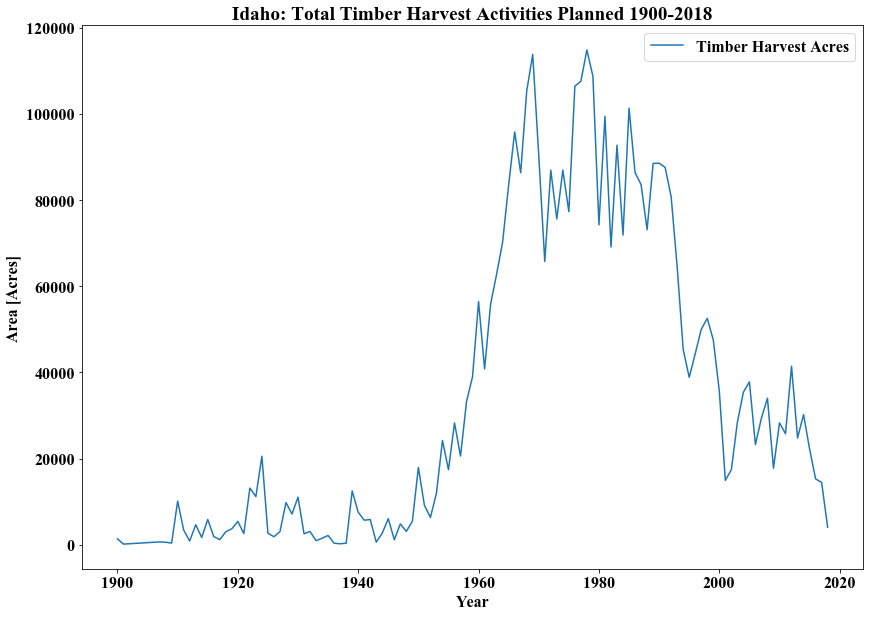

In [11]:
# Create a nice line plot

# First set the x (time) and y (area) variables 

ID_YP = ID2018_year['YP'].values
ID_P_area = ID2018_year['NBR_UNITS1'].values

fig1 = plt.figure(figsize=(14.0,10.0))

plt.rcParams.update({'font.size': 16})
plt.rcParams['font.family']='Times New Roman'

plt.plot(ID_YP,ID_P_area,label="Timber Harvest Acres")
plt.xlabel('Year')
plt.ylabel('Area [Acres]')
plt.title('Idaho: Total Timber Harvest Activities Planned 1900-2018')
#plt.savefig('fig_name.png', edgecolor='black', bbox_inches='tight', pad_inches=0.25)
plt.legend()
plt.show()

In [12]:
ID2018Accom_year = ID2018Accom.groupby('YA').sum()
ID2018Accom_year = ID2018Accom_year.reset_index()
ID2018Accom_year.head(5)

,YA,ADMIN_FORE,ACTIVITY_2,NBR_UNITS1,MA,DA,YP,MP,DP
0,1900,63,63168,1224.0,108,15,28500,108,15
1,1901,24,25320,135.0,48,6,11406,48,6
2,1907,156,165009,642.0,234,351,74373,234,351
3,1908,96,101544,567.0,162,24,45792,162,24
4,1909,72,76158,372.0,180,162,34362,180,162


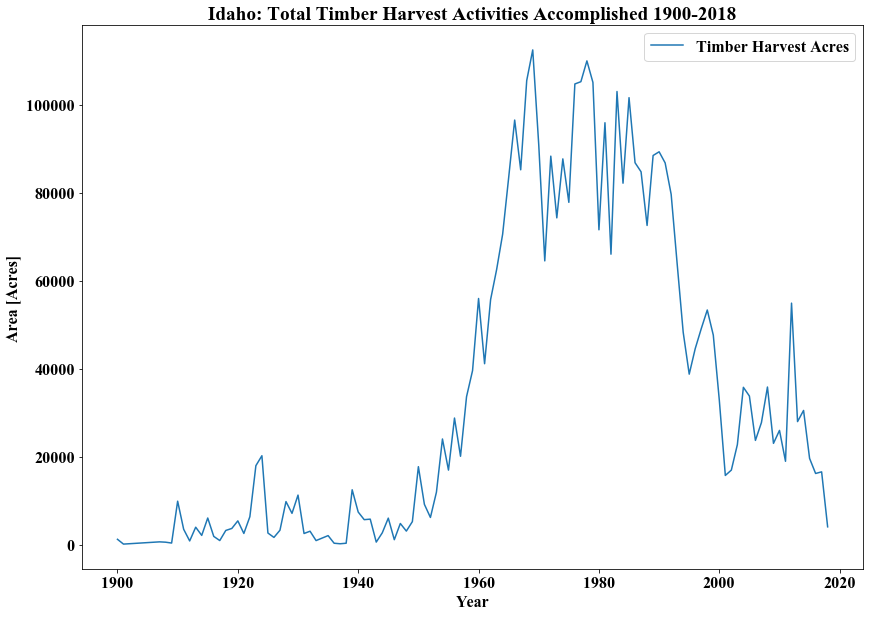

In [13]:
ID_YA = ID2018Accom_year['YA'].values
ID_A_area = ID2018Accom_year['NBR_UNITS1'].values

fig2 = plt.figure(figsize=(14.0,10.0))

plt.rcParams.update({'font.size': 16})
plt.rcParams['font.family']='Times New Roman'

plt.plot(ID_YA,ID_A_area,label="Timber Harvest Acres")
plt.xlabel('Year')
plt.ylabel('Area [Acres]')
plt.title('Idaho: Total Timber Harvest Activities Accomplished 1900-2018')
#plt.savefig('fig_name.png', edgecolor='black', bbox_inches='tight', pad_inches=0.25)
plt.legend()
plt.show()

In [14]:
ID2018Comp_year = ID2018Comp.groupby('YC').sum()
ID2018Comp_year = ID2018Comp_year.reset_index()
ID2018Comp_year.head(5)

,YC,ADMIN_FORE,ACTIVITY_2,NBR_UNITS1,MC,DC,YP,MP,DP
0,1900,63,63168,1224.0,108,15,28500,108,15
1,1901,24,25320,135.0,48,6,11406,48,6
2,1907,156,165009,642.0,294,123,74373,234,351
3,1908,96,101544,567.0,162,24,45792,162,24
4,1910,1008,1065012,8847.0,2649,687,481317,2652,711


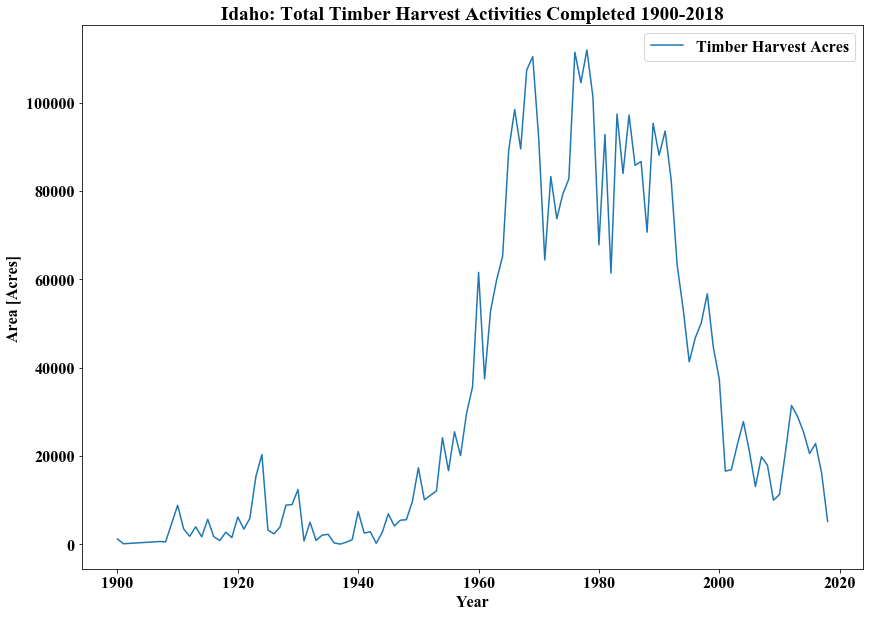

In [15]:
ID_YC = ID2018Comp_year['YC'].values
ID_C_area = ID2018Comp_year['NBR_UNITS1'].values

fig3 = plt.figure(figsize=(14.0,10.0))

plt.rcParams.update({'font.size': 16})
plt.rcParams['font.family']='Times New Roman'

plt.plot(ID_YC,ID_C_area,label="Timber Harvest Acres")
plt.xlabel('Year')
plt.ylabel('Area [Acres]')
plt.title('Idaho: Total Timber Harvest Activities Completed 1900-2018')
#plt.savefig('fig_name.png', edgecolor='black', bbox_inches='tight', pad_inches=0.25)
plt.legend()
plt.show()

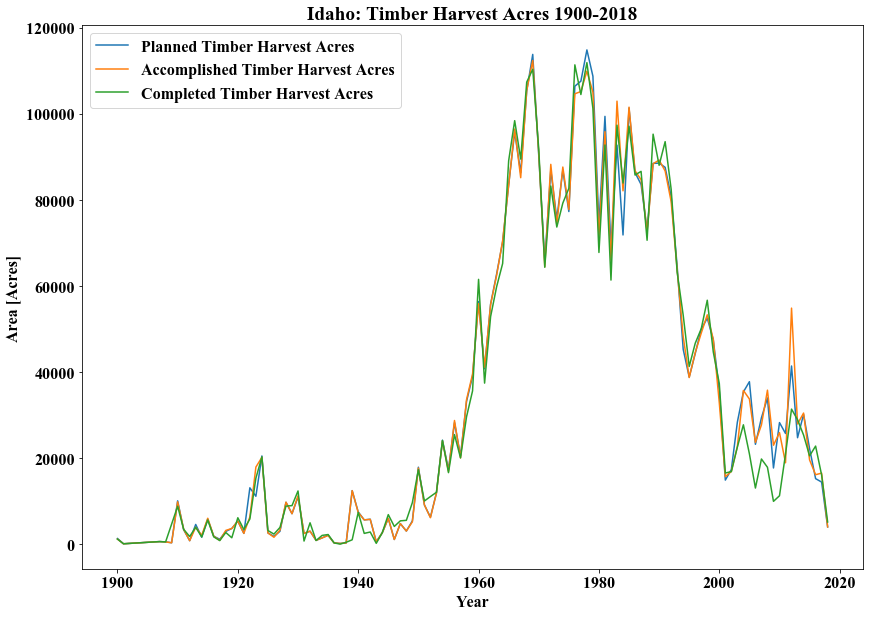

In [16]:
# Let's compare the three lines

fig4 = plt.figure(figsize=(14.0,10.0))

plt.rcParams.update({'font.size': 16})
plt.rcParams['font.family']='Times New Roman'

plt.plot(ID_YP,ID_P_area,label="Planned Timber Harvest Acres")
plt.plot(ID_YA,ID_A_area,label="Accomplished Timber Harvest Acres")
plt.plot(ID_YC,ID_C_area,label="Completed Timber Harvest Acres")
plt.xlabel('Year')
plt.ylabel('Area [Acres]')
plt.title('Idaho: Timber Harvest Acres 1900-2018')
#plt.savefig(output_data_dir + 'fig_name.png', edgecolor='black', bbox_inches='tight', pad_inches=0.25)
plt.legend()
plt.show()

Now I want to look at the time lags between planned and accomplished/completed activites. Can datetimes be added or subtracted?

In [17]:
# Yes you can add and subtract datetimes!!!

ID2018['Difference_Accom'] = (ID2018['SerDatesAccom'] - ID2018['SerDatesPlan']).dt.days
ID2018.head(10)

,ADMIN_FORE,ADMIN_FO_1,ADMIN_DIST,ACTIVITY_2,ACTIVITY_N,NEPA_PROJE,NEPA_DOC_N,IMPLEMENTA,NBR_UNITS1,SerDatesPlan,SerDatesAccom,SerDatesComp,YP,MP,DP,Difference_Accom
0,12,Payette National Forest,New Meadows Ranger District,4143,Overstory Removal Cut (from advanced regenerat...,NOT REQD,DEFAULT FOR NOT REQUIRED,NaN,30.0,1969-09-01,1969-09-01,1969-09-01,1969,9,1,0.0
1,12,Payette National Forest,New Meadows Ranger District,4113,Stand Clearcut (EA/RH/FH),NOT REQD,DEFAULT FOR NOT REQUIRED,NaN,34.0,1985-09-01,1985-09-01,1985-09-01,1985,9,1,0.0
2,12,Payette National Forest,Council Ranger District,4210,Improvement Cut,NOT REQD,DEFAULT FOR NOT REQUIRED,NaN,19.0,1977-08-01,1977-08-01,1977-08-01,1977,8,1,0.0
3,17,Nez Perce - Clearwater National Forest,Slate Creek Ranger District,4131,Shelterwood Establishment Cut (with or without...,NOT REQD,DEFAULT FOR NOT REQUIRED,NaN,46.0,1981-09-01,1981-09-01,1981-09-01,1981,9,1,0.0
4,5,NaN,North Fork Ranger District,4113,Stand Clearcut (EA/RH/FH),NOT REQD,DEFAULT FOR NOT REQUIRED,NaN,22.0,1963-10-01,1963-10-01,1963-10-01,1963,10,1,0.0
5,4,Idaho Panhandle National Forests,Bonners Ferry Ranger District,4132,Seed-tree Seed Cut (with and without leave tre...,NOT REQD,DEFAULT FOR NOT REQUIRED,NaN,2.0,1983-06-01,1983-06-01,1983-06-01,1983,6,1,0.0
6,15,Caribou-Targhee National Forest,Montpelier-Cache Ranger District,4113,Stand Clearcut (EA/RH/FH),NaN,NaN,NaN,37.0,1972-06-30,1973-12-31,1973-12-31,1972,6,30,549.0
7,5,NaN,North Fork Ranger District,4113,Stand Clearcut (EA/RH/FH),NOT REQD,DEFAULT FOR NOT REQUIRED,NaN,37.0,1992-05-01,1992-05-01,1992-05-01,1992,5,1,0.0
8,5,NaN,North Fork Ranger District,4231,"Salvage Cut (intermediate treatment, not regen...",NOT REQD,DEFAULT FOR NOT REQUIRED,NaN,1.0,1994-09-01,1994-09-01,1994-09-01,1994,9,1,0.0
9,4,Idaho Panhandle National Forests,Wallace Ranger District,4113,Stand Clearcut (EA/RH/FH),NOT REQD,DEFAULT FOR NOT REQUIRED,NaN,4.0,1981-07-01,1981-07-01,1981-07-01,1981,7,1,0.0


In [18]:
ID2018['Difference_Comp'] = (ID2018['SerDatesComp'] - ID2018['SerDatesPlan']).dt.days
ID2018.head(10)

,ADMIN_FORE,ADMIN_FO_1,ADMIN_DIST,ACTIVITY_2,ACTIVITY_N,NEPA_PROJE,NEPA_DOC_N,IMPLEMENTA,NBR_UNITS1,SerDatesPlan,SerDatesAccom,SerDatesComp,YP,MP,DP,Difference_Accom,Difference_Comp
0,12,Payette National Forest,New Meadows Ranger District,4143,Overstory Removal Cut (from advanced regenerat...,NOT REQD,DEFAULT FOR NOT REQUIRED,NaN,30.0,1969-09-01,1969-09-01,1969-09-01,1969,9,1,0.0,0.0
1,12,Payette National Forest,New Meadows Ranger District,4113,Stand Clearcut (EA/RH/FH),NOT REQD,DEFAULT FOR NOT REQUIRED,NaN,34.0,1985-09-01,1985-09-01,1985-09-01,1985,9,1,0.0,0.0
2,12,Payette National Forest,Council Ranger District,4210,Improvement Cut,NOT REQD,DEFAULT FOR NOT REQUIRED,NaN,19.0,1977-08-01,1977-08-01,1977-08-01,1977,8,1,0.0,0.0
3,17,Nez Perce - Clearwater National Forest,Slate Creek Ranger District,4131,Shelterwood Establishment Cut (with or without...,NOT REQD,DEFAULT FOR NOT REQUIRED,NaN,46.0,1981-09-01,1981-09-01,1981-09-01,1981,9,1,0.0,0.0
4,5,NaN,North Fork Ranger District,4113,Stand Clearcut (EA/RH/FH),NOT REQD,DEFAULT FOR NOT REQUIRED,NaN,22.0,1963-10-01,1963-10-01,1963-10-01,1963,10,1,0.0,0.0
5,4,Idaho Panhandle National Forests,Bonners Ferry Ranger District,4132,Seed-tree Seed Cut (with and without leave tre...,NOT REQD,DEFAULT FOR NOT REQUIRED,NaN,2.0,1983-06-01,1983-06-01,1983-06-01,1983,6,1,0.0,0.0
6,15,Caribou-Targhee National Forest,Montpelier-Cache Ranger District,4113,Stand Clearcut (EA/RH/FH),NaN,NaN,NaN,37.0,1972-06-30,1973-12-31,1973-12-31,1972,6,30,549.0,549.0
7,5,NaN,North Fork Ranger District,4113,Stand Clearcut (EA/RH/FH),NOT REQD,DEFAULT FOR NOT REQUIRED,NaN,37.0,1992-05-01,1992-05-01,1992-05-01,1992,5,1,0.0,0.0
8,5,NaN,North Fork Ranger District,4231,"Salvage Cut (intermediate treatment, not regen...",NOT REQD,DEFAULT FOR NOT REQUIRED,NaN,1.0,1994-09-01,1994-09-01,1994-09-01,1994,9,1,0.0,0.0
9,4,Idaho Panhandle National Forests,Wallace Ranger District,4113,Stand Clearcut (EA/RH/FH),NOT REQD,DEFAULT FOR NOT REQUIRED,NaN,4.0,1981-07-01,1981-07-01,1981-07-01,1981,7,1,0.0,0.0


In [19]:
ID2018.groupby('ACTIVITY_N').mean()

,ADMIN_FORE,ACTIVITY_2,NBR_UNITS1,YP,MP,DP,Difference_Accom,Difference_Comp
ACTIVITY_N,,,,,,,,
Commercial Thin,7.421669,4220.0,26.710615,1995.342972,7.204429,9.166362,73.638794,409.807761
Coppice Cut (w/leave trees) (EA/RH/FH),15.000000,4102.0,24.416667,2008.333333,9.000000,27.916667,36.600000,1270.777778
Group Selection Cut (UA/RH/FH),5.668412,4152.0,23.001745,1995.815009,7.249564,7.240838,18.407018,357.249064
Harvest Without Restocking,6.045070,4242.0,11.800000,1994.487324,7.498592,3.794366,32.510029,96.828080
Improvement Cut,6.796069,4210.0,25.955610,1984.334152,7.415233,7.666667,41.030000,241.759447
Liberation Cut,5.900476,4211.0,29.189532,1975.024584,7.965900,3.100317,24.448769,139.118374
Overstory Removal Cut (from advanced regeneration) (EA/RH/FH),10.470588,4143.0,25.950000,1979.855882,8.117647,6.661765,1.702065,50.623881
Patch Clearcut (EA/RH/FH),10.321489,4111.0,14.149915,1984.485618,7.358714,4.445008,106.807167,153.429348
"Salvage Cut (intermediate treatment, not regeneration)",5.222500,4231.0,24.399102,1977.540714,7.990007,3.702241,29.577104,115.317999


In [20]:
x = ID2018.loc[ID2018['ACTIVITY_2']==4175]
#x

# So ACTIVITY 4175 has never been "completed" in Idaho National Forests 
# as of 2018, however, this activity was planned for the (PALS)BOTTOM CANYON PROJECT
# to be completed in 2017.

In [21]:
# To make the bar plots I want to I need to create a new data frame from
# the ID2018 groupby mean

ID2018_diff = ID2018.groupby('ACTIVITY_N').mean().reset_index()
ID2018_diff.head(5)

,ACTIVITY_N,ADMIN_FORE,ACTIVITY_2,NBR_UNITS1,YP,MP,DP,Difference_Accom,Difference_Comp
0,Commercial Thin,7.421669,4220.0,26.710615,1995.342972,7.204429,9.166362,73.638794,409.807761
1,Coppice Cut (w/leave trees) (EA/RH/FH),15.000000,4102.0,24.416667,2008.333333,9.000000,27.916667,36.600000,1270.777778
2,Group Selection Cut (UA/RH/FH),5.668412,4152.0,23.001745,1995.815009,7.249564,7.240838,18.407018,357.249064
3,Harvest Without Restocking,6.045070,4242.0,11.800000,1994.487324,7.498592,3.794366,32.510029,96.828080
4,Improvement Cut,6.796069,4210.0,25.955610,1984.334152,7.415233,7.666667,41.030000,241.759447


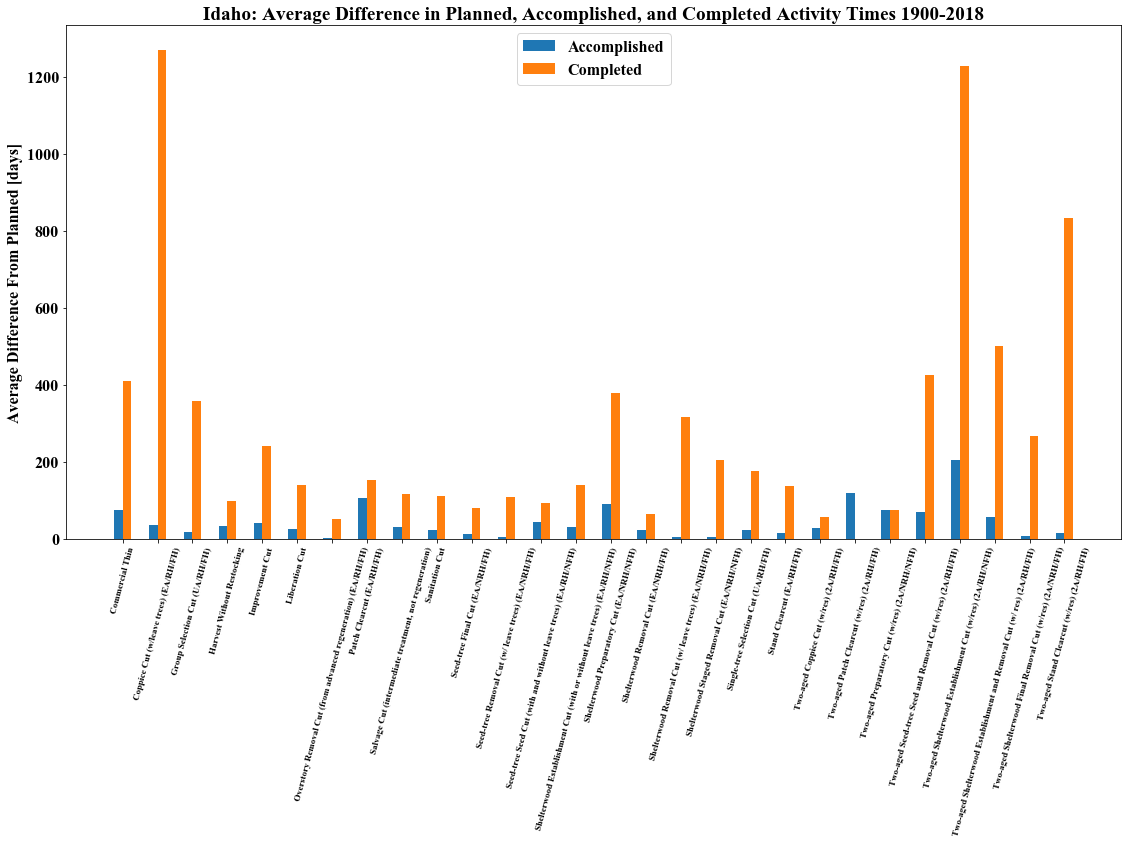

In [22]:
# So now I think I want to make a bar plot showing the average lag time 
# between planned/accomplished and planned/completed by activity type.

fig5, ax = plt.subplots(figsize=(16.0,12.0))

plt.rcParams.update({'font.size': 16})
plt.rcParams['font.family']='Times New Roman'


activity = ID2018_diff['ACTIVITY_N'].values
diff_accom = ID2018_diff['Difference_Accom'].values
diff_comp = ID2018_diff['Difference_Comp'].values

ind = np.arange(len(activity))
width = 0.25

rects1 = ax.bar(ind - width/2, diff_accom, width, label='Accomplished')
rects2 = ax.bar(ind + width/2, diff_comp, width, label='Completed')

ax.set_ylabel('Average Difference From Planned [days]')
ax.set_title('Idaho: Average Difference in Planned, Accomplished, and Completed Activity Times 1900-2018')
ax.set_xticks(ind)
ax.set_xticklabels(activity, rotation = 75, fontsize = 9)
ax.legend()

def autolabel(rects, xpos='center'):
    ha = {'center': 'center','right': 'left','left':'right'}
    offset = {'center':0,'right':1,'left':-1}
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy = (rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3,3),
                    textcoords="offset points",
                    ha=ha[xpos], va = 'bottom')

fig5.tight_layout()
plt.savefig(output_data_dir + 'ID_PL_AC_COMP_TH.png', edgecolor='black', bbox_inches='tight', pad_inches=0.25)
plt.show()

In [23]:
# I can also look at the average month that activities are completed.

#ID2018Comp.head(2) # Check that it is the correct dataset

ID2018Comp_avemonth = ID2018Comp.groupby('ACTIVITY_N').mean().reset_index()
ID2018Comp_avemonth.head(5)

,ACTIVITY_N,ADMIN_FORE,ACTIVITY_2,NBR_UNITS1,YC,MC,DC,YP,MP,DP
0,Commercial Thin,7.222838,4220.0,28.106253,1992.516630,7.751220,6.742350,1991.433259,7.245455,8.055211
1,Coppice Cut (w/leave trees) (EA/RH/FH),15.000000,4102.0,28.000000,2008.777778,9.666667,20.000000,2005.333333,9.000000,27.222222
2,Group Selection Cut (UA/RH/FH),5.732210,4152.0,23.335768,1995.395131,7.269663,3.760300,1994.421348,7.142322,6.028090
3,Harvest Without Restocking,5.856734,4242.0,12.002865,1994.785100,7.656160,2.962751,1994.530086,7.507163,3.842407
4,Improvement Cut,6.890323,4210.0,26.253364,1981.912442,7.728111,6.057143,1981.279263,7.370507,6.505069


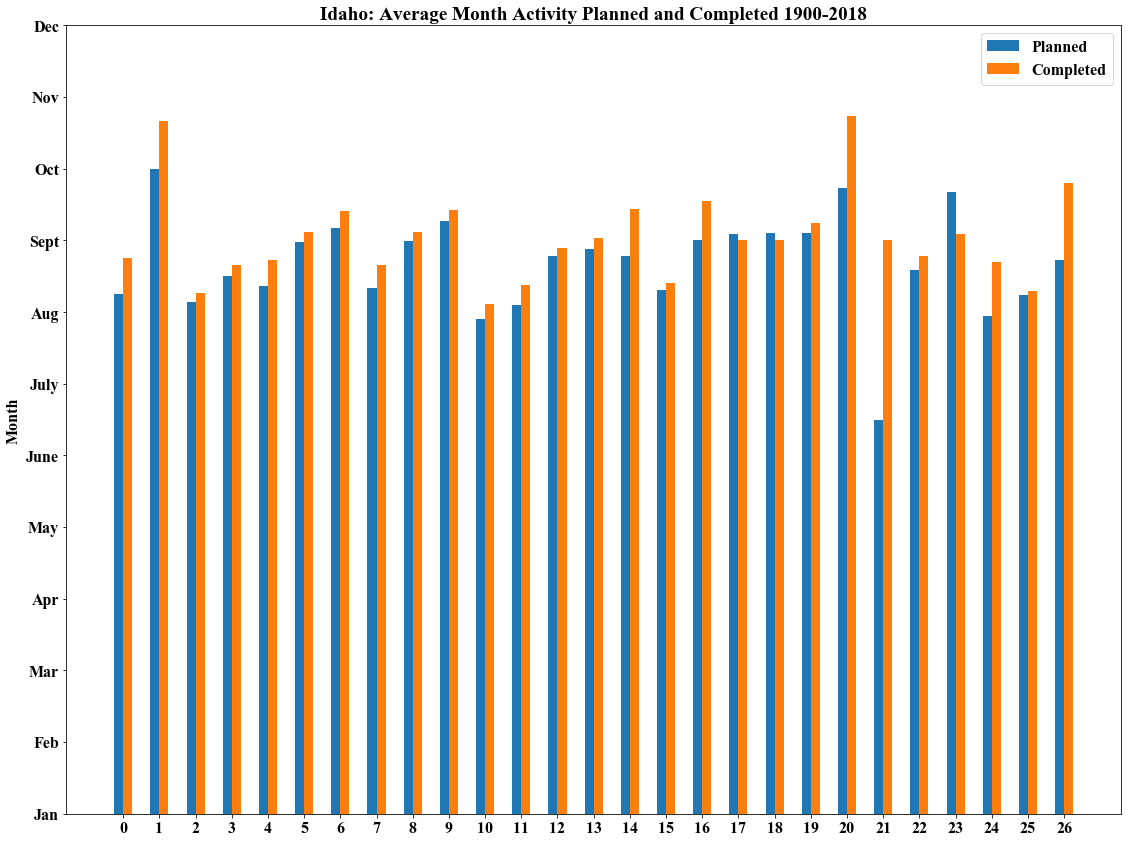

In [24]:
# Now I will look at average month planned vs average month completed
# by activity.

fig6, ax = plt.subplots(figsize=(16.0,12.0))

plt.rcParams.update({'font.size': 16})
plt.rcParams['font.family']='Times New Roman'


activity = ID2018Comp_avemonth['ACTIVITY_N'].values
month_plan = ID2018Comp_avemonth['MP'].values
month_comp = ID2018Comp_avemonth['MC'].values

ind = np.arange(len(activity))
width = 0.25
yticks = np.arange(12)

rects1 = ax.bar(ind - width/2, month_plan, width, label='Planned')
rects2 = ax.bar(ind + width/2, month_comp, width, label='Completed')

ax.set_ylabel('Month')
ax.set_yticks(yticks)
ax.set_yticklabels(('Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'))
ax.set_title('Idaho: Average Month Activity Planned and Completed 1900-2018')
ax.set_xticks(ind)
#ax.set_xticklabels(activity, rotation = 75, fontsize = 9)
ax.legend()

def autolabel(rects, xpos='center'):
    ha = {'center': 'center','right': 'left','left':'right'}
    offset = {'center':0,'right':1,'left':-1}
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy = (rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3,3),
                    textcoords="offset points",
                    ha=ha[xpos], va = 'bottom')

fig6.tight_layout()
plt.savefig(output_data_dir + 'ID_TH_MONTH_PL_COMP.png', edgecolor='black', bbox_inches='tight', pad_inches=0.25)
plt.show()

 I finally feel like I am getting the hang of this, and I feel like I can say so much about the data now!

In [25]:
ID2018Comp['Difference_Comp'] = (ID2018Comp['SerDatesComp'] - ID2018Comp['SerDatesPlan']).dt.days
ID2018Comp.head(2)

,ADMIN_FORE,ADMIN_FO_1,ADMIN_DIST,ACTIVITY_2,ACTIVITY_N,NEPA_PROJE,NEPA_DOC_N,IMPLEMENTA,NBR_UNITS1,SerDatesPlan,SerDatesAccom,SerDatesComp,YC,MC,DC,YP,MP,DP,Difference_Comp
0,12,Payette National Forest,New Meadows Ranger District,4143,Overstory Removal Cut (from advanced regenerat...,NOT REQD,DEFAULT FOR NOT REQUIRED,NaN,30.0,1969-09-01,1969-09-01,1969-09-01,1969,9,1,1969,9,1,0
1,12,Payette National Forest,New Meadows Ranger District,4113,Stand Clearcut (EA/RH/FH),NOT REQD,DEFAULT FOR NOT REQUIRED,NaN,34.0,1985-09-01,1985-09-01,1985-09-01,1985,9,1,1985,9,1,0


In [26]:
# Can I look at specific projects and years?? 

ID2018Comp.groupby(['NEPA_DOC_N','ACTIVITY_2']).mean()

ADMIN_FORE  \
NEPA_DOC_N                                         ACTIVITY_2               
(PALS)2010 FORESTWIDE PRECOMMERCIAL THINNING       4131               5.0   
(PALS)ADAMS CAMP WILDFIRE PROTECTION PROJECT       4132              17.0   
                                                   4220              17.0   
(PALS)AIRLINE VEGETATION MANAGEMENT PROJECT        4220               2.0   
(PALS)AMERICAN AND CROOKED RIVER PROJECT RECORD... 4132              17.0   
(PALS)ANTLER SALVAGE                               4231              17.0   
(PALS)AVELENE SALVAGE PROJECT                      4231               2.0   
(PALS)BEAR TORNADO RECOVERY PROJECT                4143              12.0   
                                                   4231              12.0   
(PALS)BEAVER CREEK                                 4132               4.0   
                                                   4143               4.0   
                                                   4183               4.0   
                                                   4193               4.0   
                                                   4210               4.0   
                                                   4220               4.0   
(PALS)BEAVER CREEK FUELS REDUCTION PROJECT         4231              14.0   
(PALS)BENTON CREEK TITLE IV HFRA                   4183               4.0   
                                                   4193               4.0   
(PALS)BIG SMOKY SUMMER HOMES: HAZARD FUELS REDU... 4220              14.0   
(PALS)BLACKTAIL HAZARDOUS FUELS PROJECT            4151              17.0   
                                                   4220              17.0   
                                                   4232              17.0   
(PALS)BLUE ALDER HFRA                              4113               4.0   
                                                   4194               4.0   
                                                   4210               4.0   
(PALS)BONANZA FOREST PRODUCTS PROJECT              4231              13.0   
(PALS)BRUNDAGE VEGETATION MANAGEMENT PROJECT       4111              12.0   
                                                   4220              12.0   
                                                   4231              12.0   
                                                   4242              12.0   
...                                                                   ...   
SAVANT SAGE                                        4183               4.0   
                                                   4193               4.0   
SILVER CREEK                                       4220               2.0   
SIXSHOOTER PROJECT                                 4220               2.0   
SKOOKUM SALVAGE                                    4193               4.0   
SMALL SALES EIS PROJECT                            4131               4.0   
                                                   4210               4.0   
                                                   4220               4.0   
                                                   4231               4.0   
SPION KOPTER SALVAGE                               4193               4.0   
STEAMBOAT SALVAGE                                  4193               4.0   
SWEET FRANCIS                                      4220               4.0   
TAMARACK THIN                                      4220              12.0   
THIN ABOVE CAMP                                    4220               4.0   
TOBIAS FIRE MORTALITY SALE                         4231              13.0   
TOBOGGAN FIRE SALVAGE                              4183               4.0   
UNKNOWN PONY TIMBER SALE                           4152               4.0   
                                                   4196               4.0   
                                                   4231               4.0   
WENDOVER FIRE SALVAGE                              4131    

In [27]:
# Can look at specific projects and years? Yep! If I make a new dataframe will the years (or whatever the first groupby
# argument is) fill in? YES!!!

ID2018Comp.groupby(['YP','ACTIVITY_2']).mean()
idk = ID2018Comp.groupby(['YP','ACTIVITY_2']).mean().reset_index()
idk

,YP,ACTIVITY_2,ADMIN_FORE,NBR_UNITS1,YC,MC,DC,MP,DP,Difference_Comp
0,1900,4121,5.000000,20.000000,1900.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,1900,4211,4.000000,44.000000,1950.000000,8.000000,1.000000,8.000000,1.000000,18262.000000
2,1900,4231,4.000000,127.333333,1900.000000,9.000000,1.000000,9.000000,1.000000,0.000000
3,1900,4242,4.000000,6.000000,1900.000000,8.000000,1.000000,8.000000,1.000000,0.000000
4,1901,4220,4.000000,22.500000,1901.000000,8.000000,1.000000,8.000000,1.000000,0.000000
5,1907,4231,4.000000,16.461538,1907.000000,7.538462,3.153846,6.000000,9.000000,41.230769
6,1908,4231,4.000000,23.625000,1908.000000,6.750000,1.000000,6.750000,1.000000,0.000000
7,1909,4231,4.000000,20.666667,1911.666667,9.000000,1.000000,10.000000,9.000000,936.166667
8,1910,4151,4.000000,18.000000,1910.000000,9.000000,30.000000,9.000000,30.000000,0.000000
9,1910,4231,4.000000,33.824742,1911.628866,10.113402,5.494845,9.773196,2.443299,608.412371


In [28]:
# I think it would be interesting to look at how specific activities have changed through time.

testCT = idk.loc[idk['ACTIVITY_2'] == 4220].copy().reset_index()
testCT

,index,YP,ACTIVITY_2,ADMIN_FORE,NBR_UNITS1,YC,MC,DC,MP,DP,Difference_Comp
0,4,1901,4220,4.000000,22.500000,1901.000000,8.000000,1.000000,8.000000,1.000000,0.000000
1,64,1930,4220,4.000000,24.000000,1930.000000,6.000000,1.000000,6.000000,1.000000,0.000000
2,82,1938,4220,4.000000,36.000000,1938.000000,10.000000,1.000000,10.000000,1.000000,0.000000
3,92,1940,4220,5.000000,41.800000,1940.000000,11.000000,1.000000,11.000000,1.000000,0.000000
4,97,1941,4220,5.000000,50.000000,1941.000000,6.000000,1.000000,6.000000,1.000000,0.000000
5,144,1950,4220,12.000000,27.105263,1950.000000,7.368421,1.000000,7.368421,1.000000,0.000000
6,154,1951,4220,12.000000,48.333333,1951.000000,7.000000,1.000000,7.000000,1.000000,0.000000
7,163,1952,4220,4.000000,103.000000,1954.000000,10.000000,1.000000,6.000000,2.000000,851.000000
8,190,1955,4220,10.500000,48.500000,1955.000000,8.000000,1.000000,8.000000,1.000000,0.000000
9,200,1956,4220,4.000000,162.000000,1956.000000,10.000000,1.000000,10.000000,1.000000,0.000000


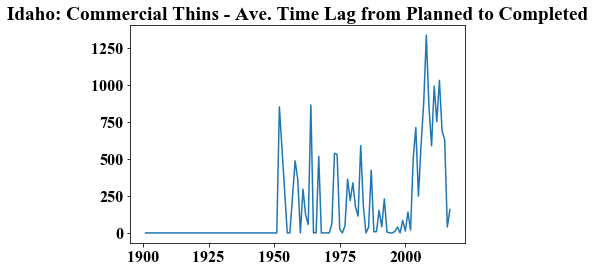

In [29]:
x = testCT['YP'].values
y = testCT['Difference_Comp']

plt.plot(x,y)
plt.title("Idaho: Commercial Thins - Ave. Time Lag from Planned to Completed")
plt.savefig(output_data_dir + 'TEST_comthin_timelag.png', edgecolor='black', bbox_inches='tight', pad_inches=0.25)
#plt.scatter(x,y)
plt.show()

16 July 2019: I think this is a good stopping point. I would like to make a figure like above but have the size of the scatter points change with average size. What I'm trying to show is how the lag time from plan comp date to actual comp date has changed through time (for specific activities, may be extra interesting to examine SALVAGE projects. I think that would be interesting to put into the context of what policies came into play or with changes in admin or Forest Chief...

In [30]:
# Work on the above scatter plot (size of dot = average # of activities and/or average size of activities) start with 
# Boise NF

Update: 25 July 2019 working on the figure above and incorporating the comments to create a scatter plot where the size of the dot is equal to the average # of activities or average size of activities.

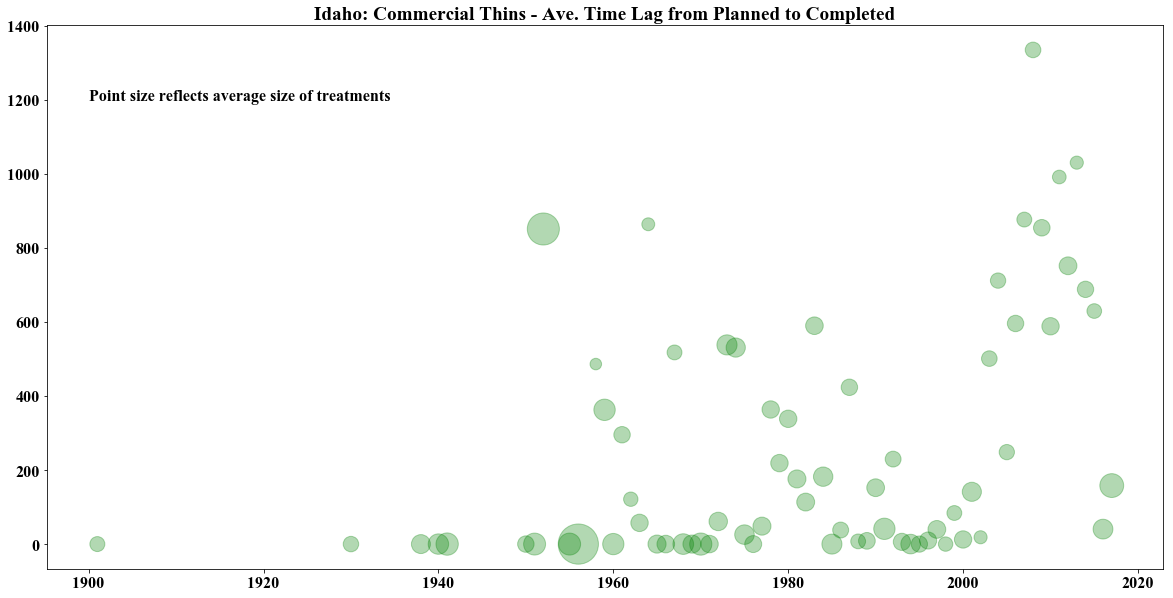

In [43]:
x1 = testCT['YP'].values
y1 = testCT['Difference_Comp']
scale = testCT['NBR_UNITS1'].values

fig = plt.figure(figsize = (20,10))
plt.scatter(x1,y1,s=10*scale, alpha = 0.3, c='green')
plt.text(1900,1200,'Point size reflects average size of treatments')
plt.title("Idaho: Commercial Thins - Ave. Time Lag from Planned to Completed")
#plt.savefig(output_data_dir + 'TEST_comthin_timelag.png', edgecolor='black', bbox_inches='tight', pad_inches=0.25)
#plt.scatter(x,y)
plt.show()

In [35]:
idk_count = ID2018Comp.groupby(['YP','ACTIVITY_2']).count().reset_index()
idk_count

,YP,ACTIVITY_2,ADMIN_FORE,ADMIN_FO_1,ADMIN_DIST,ACTIVITY_N,NEPA_PROJE,NEPA_DOC_N,IMPLEMENTA,NBR_UNITS1,SerDatesPlan,SerDatesAccom,SerDatesComp,YC,MC,DC,MP,DP,Difference_Comp
0,1900,4121,3,0,0,3,3,3,0,3,3,3,3,3,3,3,3,3,3
1,1900,4211,3,3,3,3,3,3,0,3,3,3,3,3,3,3,3,3,3
2,1900,4231,9,9,9,9,9,9,0,9,9,9,9,9,9,9,9,9,9
3,1900,4242,3,3,3,3,3,3,0,3,3,3,3,3,3,3,3,3,3
4,1901,4220,6,6,6,6,6,6,0,6,6,6,6,6,6,6,6,6,6
5,1907,4231,39,39,39,39,39,39,0,39,39,39,39,39,39,39,39,39,39
6,1908,4231,24,24,24,24,24,24,0,24,24,24,24,24,24,24,24,24,24
7,1909,4231,18,18,18,18,18,18,0,18,18,18,18,18,18,18,18,18,18
8,1910,4151,15,15,15,15,15,15,0,15,15,15,15,15,15,15,15,15,15
9,1910,4231,291,291,291,291,291,291,0,291,291,291,291,291,291,291,291,291,291


In [36]:
testCT_count = idk_count.loc[idk_count['ACTIVITY_2'] == 4220].copy().reset_index()
testCT_count

,index,YP,ACTIVITY_2,ADMIN_FORE,ADMIN_FO_1,ADMIN_DIST,ACTIVITY_N,NEPA_PROJE,NEPA_DOC_N,IMPLEMENTA,NBR_UNITS1,SerDatesPlan,SerDatesAccom,SerDatesComp,YC,MC,DC,MP,DP,Difference_Comp
0,4,1901,4220,6,6,6,6,6,6,0,6,6,6,6,6,6,6,6,6,6
1,64,1930,4220,3,3,3,3,3,3,0,3,3,3,3,3,3,3,3,3,3
2,82,1938,4220,3,3,3,3,3,3,0,3,3,3,3,3,3,3,3,3,3
3,92,1940,4220,15,0,15,15,15,15,0,15,15,15,15,15,15,15,15,15,15
4,97,1941,4220,6,0,6,6,6,6,0,6,6,6,6,6,6,6,6,6,6
5,144,1950,4220,57,57,57,57,57,57,0,57,57,57,57,57,57,57,57,57,57
6,154,1951,4220,18,18,18,18,18,18,0,18,18,18,18,18,18,18,18,18,18
7,163,1952,4220,6,6,6,6,6,6,0,6,6,6,6,6,6,6,6,6,6
8,190,1955,4220,6,6,6,6,6,6,0,6,6,6,6,6,6,6,6,6,6
9,200,1956,4220,3,3,3,3,3,3,0,3,3,3,3,3,3,3,3,3,3


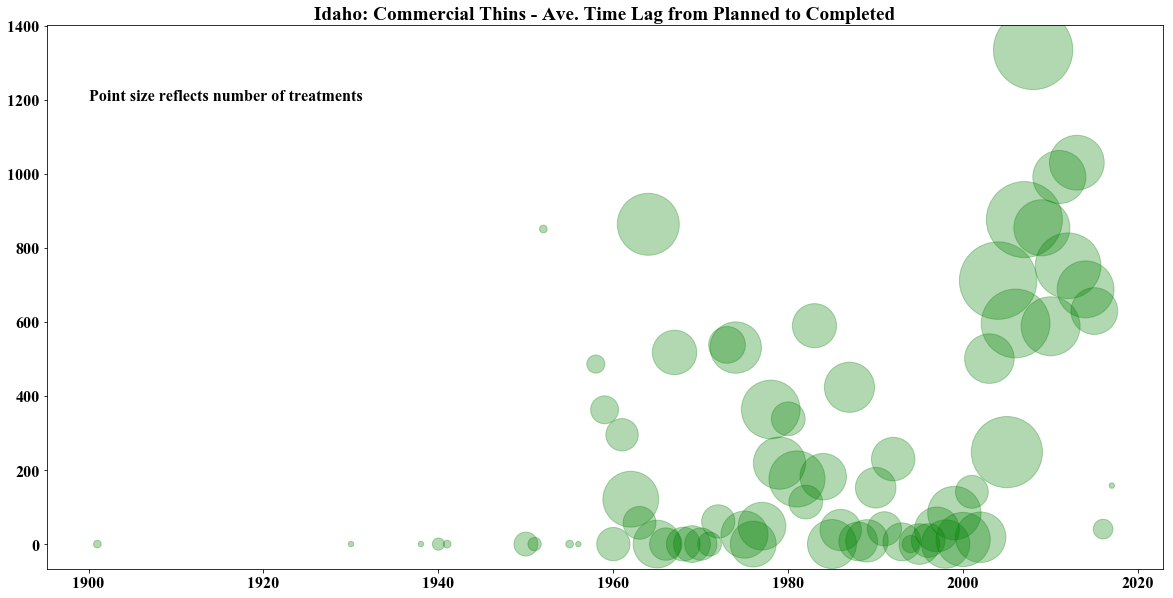

In [42]:
x2 = testCT_count['YP'].values
scale2 = testCT_count['NBR_UNITS1'].values

fig = plt.figure(figsize = (20,10))
plt.scatter(x2,y1,s=10*scale2, alpha = 0.3, c='green')
plt.text(1900,1200,'Point size reflects number of treatments')
plt.title("Idaho: Commercial Thins - Ave. Time Lag from Planned to Completed")
#plt.savefig(output_data_dir + 'TEST_comthin_timelag.png', edgecolor='black', bbox_inches='tight', pad_inches=0.25)
#plt.scatter(x,y)
plt.show()

In [58]:
ID2018_proj = ID2018.groupby(['NEPA_DOC_N','ACTIVITY_N','SerDatesComp']).sum().reset_index()
ID2018_proj.head(15)

,NEPA_DOC_N,ACTIVITY_N,SerDatesComp,ADMIN_FORE,ACTIVITY_2,NBR_UNITS1,YP,MP,DP,Difference_Accom,Difference_Comp
0,(PALS)2010 FORESTWIDE PRECOMMERCIAL THINNING,Shelterwood Establishment Cut (with or without...,1977-06-01,15,12393,75.0,5931,18,3,0.0,0.0
1,(PALS)ADAMS CAMP WILDFIRE PROTECTION PROJECT,Commercial Thin,2015-11-23,51,12660,63.0,6045,27,90,0.0,162.0
2,(PALS)ADAMS CAMP WILDFIRE PROTECTION PROJECT,Commercial Thin,2017-09-19,51,12660,168.0,6045,27,90,0.0,2160.0
3,(PALS)ADAMS CAMP WILDFIRE PROTECTION PROJECT,Commercial Thin,2017-09-28,51,12660,27.0,6045,27,90,0.0,2187.0
4,(PALS)ADAMS CAMP WILDFIRE PROTECTION PROJECT,Commercial Thin,2017-11-21,102,25320,225.0,12090,54,180,0.0,4698.0
5,(PALS)ADAMS CAMP WILDFIRE PROTECTION PROJECT,Commercial Thin,2018-01-10,51,12660,234.0,6045,27,90,0.0,2499.0
6,(PALS)ADAMS CAMP WILDFIRE PROTECTION PROJECT,Commercial Thin,2018-01-18,51,12660,243.0,6045,27,90,0.0,2523.0
7,(PALS)ADAMS CAMP WILDFIRE PROTECTION PROJECT,Commercial Thin,2018-01-26,51,12660,336.0,6045,27,90,0.0,2547.0
8,(PALS)ADAMS CAMP WILDFIRE PROTECTION PROJECT,Seed-tree Seed Cut (with and without leave tre...,2015-11-16,51,12396,39.0,6045,27,90,0.0,141.0
9,(PALS)ADAMS CAMP WILDFIRE PROTECTION PROJECT,Seed-tree Seed Cut (with and without leave tre...,2015-11-23,51,12396,63.0,6045,27,90,0.0,162.0


In [59]:
ugh = ID2018_proj.loc[ID2018_proj['NEPA_DOC_N']=='(PALS)ADAMS CAMP WILDFIRE PROTECTION PROJECT'].copy()
ugh

,NEPA_DOC_N,ACTIVITY_N,SerDatesComp,ADMIN_FORE,ACTIVITY_2,NBR_UNITS1,YP,MP,DP,Difference_Accom,Difference_Comp
1,(PALS)ADAMS CAMP WILDFIRE PROTECTION PROJECT,Commercial Thin,2015-11-23,51,12660,63.0,6045,27,90,0.0,162.0
2,(PALS)ADAMS CAMP WILDFIRE PROTECTION PROJECT,Commercial Thin,2017-09-19,51,12660,168.0,6045,27,90,0.0,2160.0
3,(PALS)ADAMS CAMP WILDFIRE PROTECTION PROJECT,Commercial Thin,2017-09-28,51,12660,27.0,6045,27,90,0.0,2187.0
4,(PALS)ADAMS CAMP WILDFIRE PROTECTION PROJECT,Commercial Thin,2017-11-21,102,25320,225.0,12090,54,180,0.0,4698.0
5,(PALS)ADAMS CAMP WILDFIRE PROTECTION PROJECT,Commercial Thin,2018-01-10,51,12660,234.0,6045,27,90,0.0,2499.0
6,(PALS)ADAMS CAMP WILDFIRE PROTECTION PROJECT,Commercial Thin,2018-01-18,51,12660,243.0,6045,27,90,0.0,2523.0
7,(PALS)ADAMS CAMP WILDFIRE PROTECTION PROJECT,Commercial Thin,2018-01-26,51,12660,336.0,6045,27,90,0.0,2547.0
8,(PALS)ADAMS CAMP WILDFIRE PROTECTION PROJECT,Seed-tree Seed Cut (with and without leave tre...,2015-11-16,51,12396,39.0,6045,27,90,0.0,141.0
9,(PALS)ADAMS CAMP WILDFIRE PROTECTION PROJECT,Seed-tree Seed Cut (with and without leave tre...,2015-11-23,51,12396,63.0,6045,27,90,0.0,162.0
10,(PALS)ADAMS CAMP WILDFIRE PROTECTION PROJECT,Seed-tree Seed Cut (with and without leave tre...,2015-12-23,51,12396,63.0,6045,27,90,0.0,252.0


In [67]:
ugh['time_since_disturbance'] = ugh.SerDatesComp.diff()
ugh.to_csv(output_data_dir + 'time_since_disturb_test.csv',encoding='utf-8')

In [68]:
ugh

,NEPA_DOC_N,ACTIVITY_N,SerDatesComp,ADMIN_FORE,ACTIVITY_2,NBR_UNITS1,YP,MP,DP,Difference_Accom,Difference_Comp,time_since_disturbance
1,(PALS)ADAMS CAMP WILDFIRE PROTECTION PROJECT,Commercial Thin,2015-11-23,51,12660,63.0,6045,27,90,0.0,162.0,NaT
2,(PALS)ADAMS CAMP WILDFIRE PROTECTION PROJECT,Commercial Thin,2017-09-19,51,12660,168.0,6045,27,90,0.0,2160.0,666 days
3,(PALS)ADAMS CAMP WILDFIRE PROTECTION PROJECT,Commercial Thin,2017-09-28,51,12660,27.0,6045,27,90,0.0,2187.0,9 days
4,(PALS)ADAMS CAMP WILDFIRE PROTECTION PROJECT,Commercial Thin,2017-11-21,102,25320,225.0,12090,54,180,0.0,4698.0,54 days
5,(PALS)ADAMS CAMP WILDFIRE PROTECTION PROJECT,Commercial Thin,2018-01-10,51,12660,234.0,6045,27,90,0.0,2499.0,50 days
6,(PALS)ADAMS CAMP WILDFIRE PROTECTION PROJECT,Commercial Thin,2018-01-18,51,12660,243.0,6045,27,90,0.0,2523.0,8 days
7,(PALS)ADAMS CAMP WILDFIRE PROTECTION PROJECT,Commercial Thin,2018-01-26,51,12660,336.0,6045,27,90,0.0,2547.0,8 days
8,(PALS)ADAMS CAMP WILDFIRE PROTECTION PROJECT,Seed-tree Seed Cut (with and without leave tre...,2015-11-16,51,12396,39.0,6045,27,90,0.0,141.0,-802 days
9,(PALS)ADAMS CAMP WILDFIRE PROTECTION PROJECT,Seed-tree Seed Cut (with and without leave tre...,2015-11-23,51,12396,63.0,6045,27,90,0.0,162.0,7 days
10,(PALS)ADAMS CAMP WILDFIRE PROTECTION PROJECT,Seed-tree Seed Cut (with and without leave tre...,2015-12-23,51,12396,63.0,6045,27,90,0.0,252.0,30 days
